In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model 
from keras.layers import Dense, Dropout, Activation, Flatten,Input,Convolution2D, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import h5py


%matplotlib inline
np.random.seed(1)

def load_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
    
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    #reshape y, needed for keras (120,)->(1,120)
    train_set_y_orig = train_set_y_orig.reshape(-1,1)
    test_set_y_orig = test_set_y_orig.reshape(-1,1)
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, len(classes)


from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()

# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, num_classes = load_dataset()
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = oh.fit_transform(Y_train_orig).todense()
Y_test = oh.fit_transform(Y_test_orig).todense()
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}


number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


C:\Users\miche\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

As a reminder, the SIGNS dataset is a collection of 6 signs representing numbers from 0 to 5.

<img src="images/SIGNS.png" style="width:800px;height:300px;">

The next cell will show you an example of a labelled image in the dataset. Feel free to change the value of `index` below and re-run to see different examples. 

y = 2


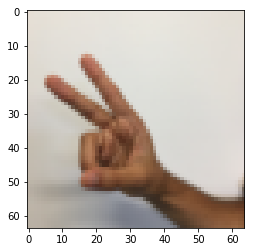

In [9]:
# Example of a picture
index = 6
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[ index])))

In [10]:
input_shape = X_train.shape[1:] # what are the input dimensions?

#lookup the functional API of keras...  new_layer_name = new_layer_type(parameters) (previous_layer)
inp = Input(shape=input_shape)

conv_1 = Convolution2D(filters = 32, kernel_size=3, padding = 'same') (inp)
pool_1 = MaxPooling2D(pool_size=2) (conv_1)
drop_1 = Dropout(0.25) (pool_1)
flat = Flatten()(drop_1)

out = Dense(num_classes, activation='softmax')(flat) 

#define the model
model = Model(inputs=inp, outputs=out)
model.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics = ['accuracy'])
model.fit(X_train,Y_train,validation_split=0.1, epochs = 10)
print('Loss, Precision: ',model.evaluate(X_test, Y_test))  # Evaluate the trained model on the test set!


Train on 972 samples, validate on 108 samples
Epoch 1/10
972/972 [==============================] - 3s 3ms/step - loss: 2.5828 - acc: 0.2016 - val_loss: 1.5662 - val_acc: 0.4352
Epoch 2/10
480/972 [=============>................] - ETA: 0s - loss: 1.4769 - acc: 0.4125

KeyboardInterrupt: 

In [3]:
from PIL import Image
from keras.models import load_model
import pickle
model = load_model('model')
datagen = pickle.load(open('datagen','rb'))
def predict_true_photo(file = 'camera/IMG_9236.jpg'):
    imag_ = Image.open(file)
    #Convert the image te RGB if it is a .gif for example
    imag_ = imag_.convert ('RGB')
    #imag_ = imag_.resize((516, 516), Image.ANTIALIAS)
    imag = imag_.resize((64, 64), Image.ANTIALIAS)
    real_photo = np.array(list(imag.getdata())).reshape(1,64,64,3)/255.
    real_photo = datagen.standardize(real_photo)

    print('Predicted number : ',np.argmax(model.predict(real_photo)))
    print(model.predict(real_photo))
    plt.figure(figsize = (10,10))
    plt.axis('off')
    plt.imshow(np.asarray(imag_))
    plt.show()
    plt.clf()
    return real_photo

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


Let's see on the real photo what happened

In [4]:
for i in range(len(X_test)):
    # this is what you are looking for
    X_test[i] = datagen.standardize(X_test[i])


In [5]:
model.evaluate(X_test, Y_test)

120/120 [==============================] - 1s 6ms/step


[0.10137045880158742, 0.974999996026357]

Predicted:  0  True value:  0
conv2d_1 32
(64, 64, 32)


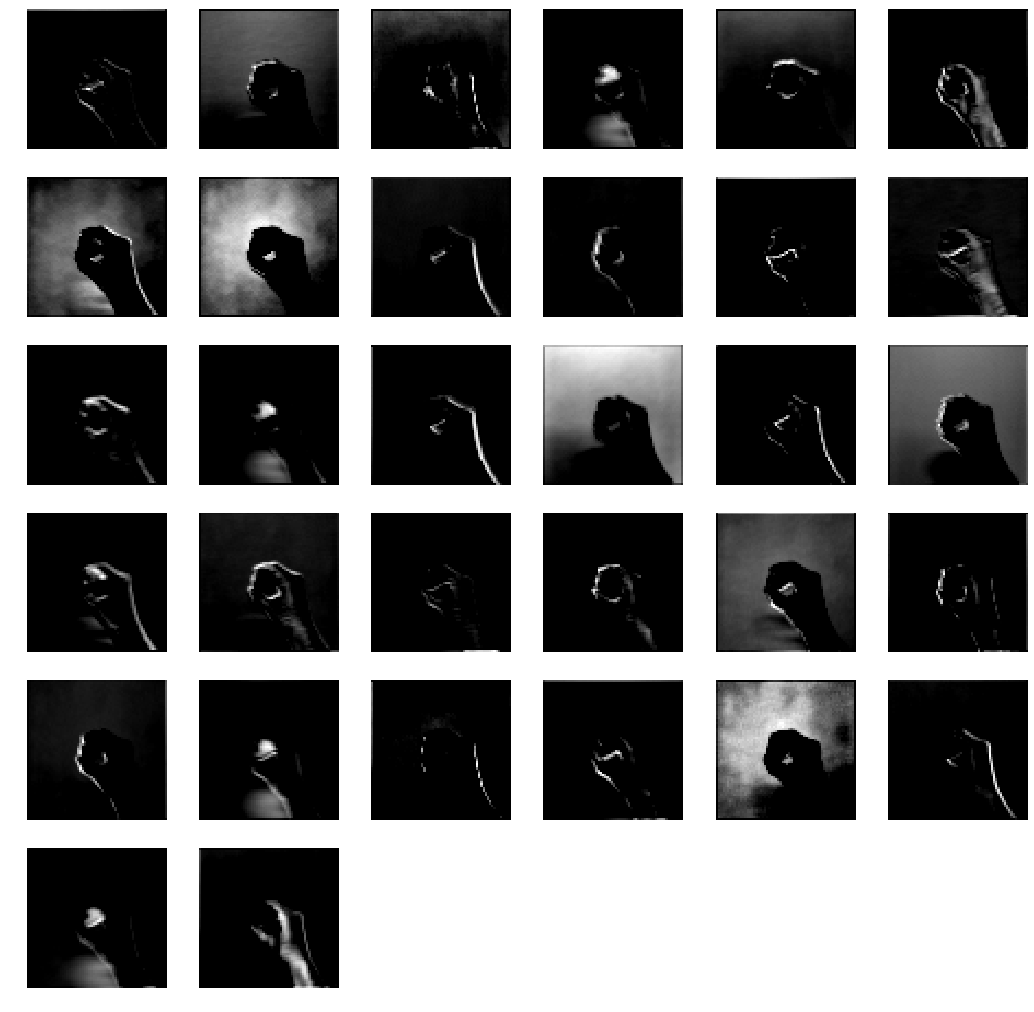

conv2d_2 16
(22, 22, 16)


<Figure size 432x288 with 0 Axes>

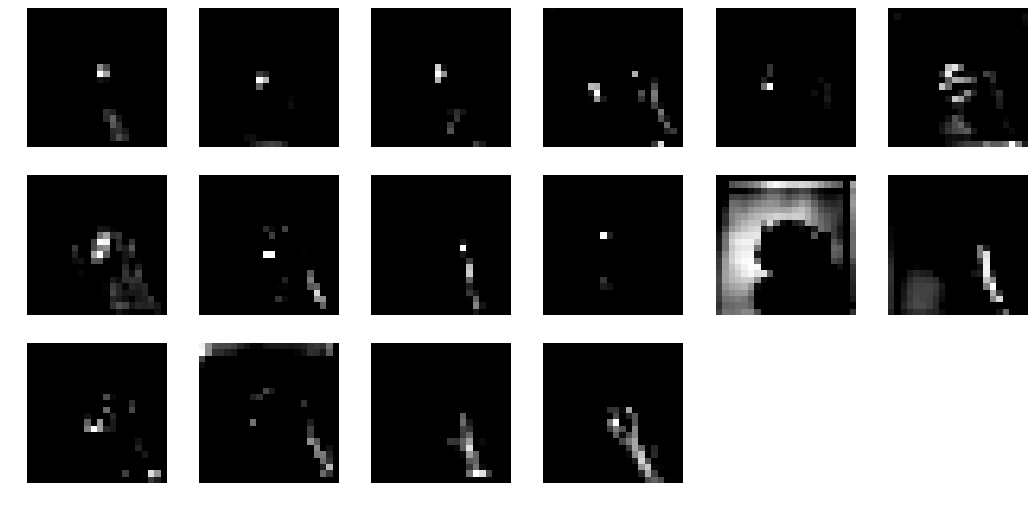

conv2d_3 32
(3, 3, 32)


<Figure size 432x288 with 0 Axes>

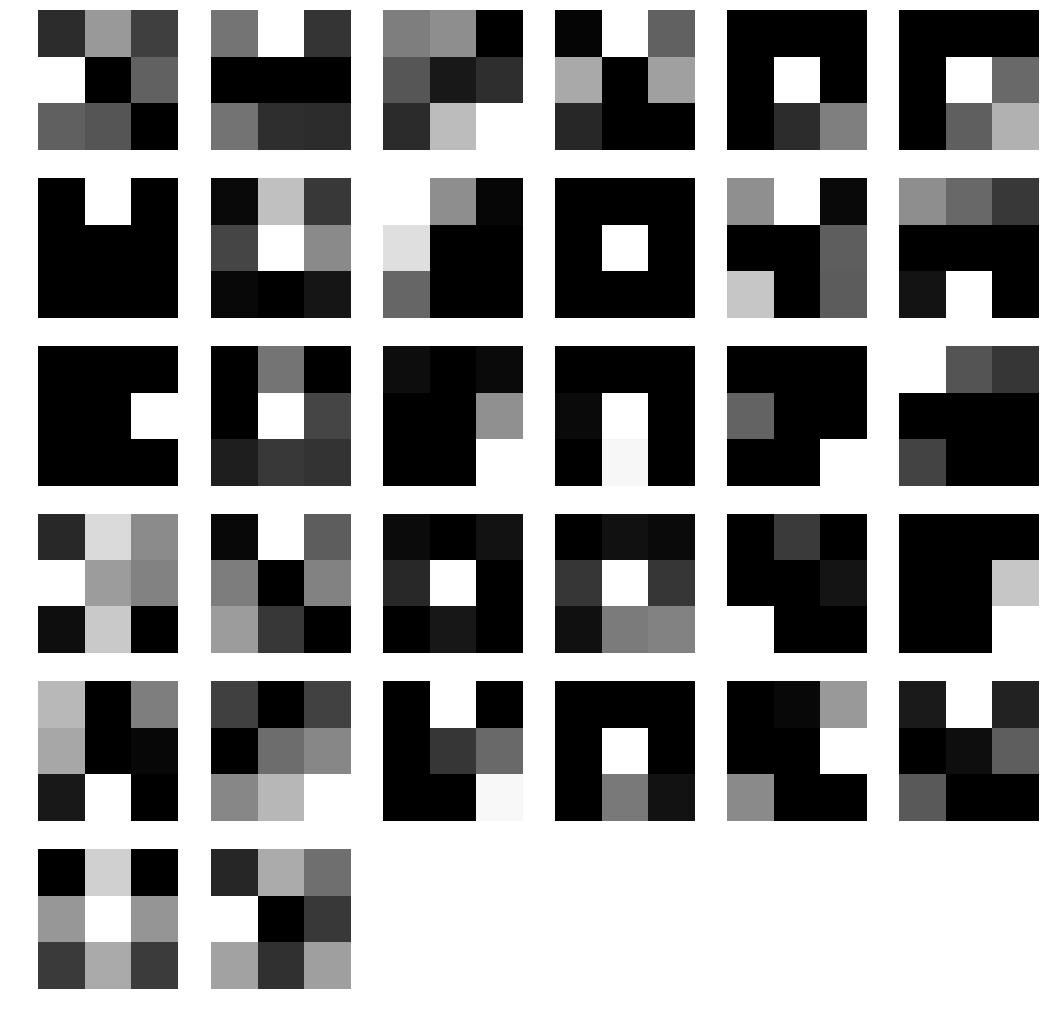

<Figure size 432x288 with 0 Axes>

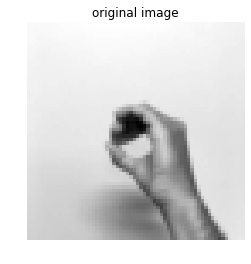

Predicted:  0  True value:  0
conv2d_1 32
(64, 64, 32)


<Figure size 432x288 with 0 Axes>

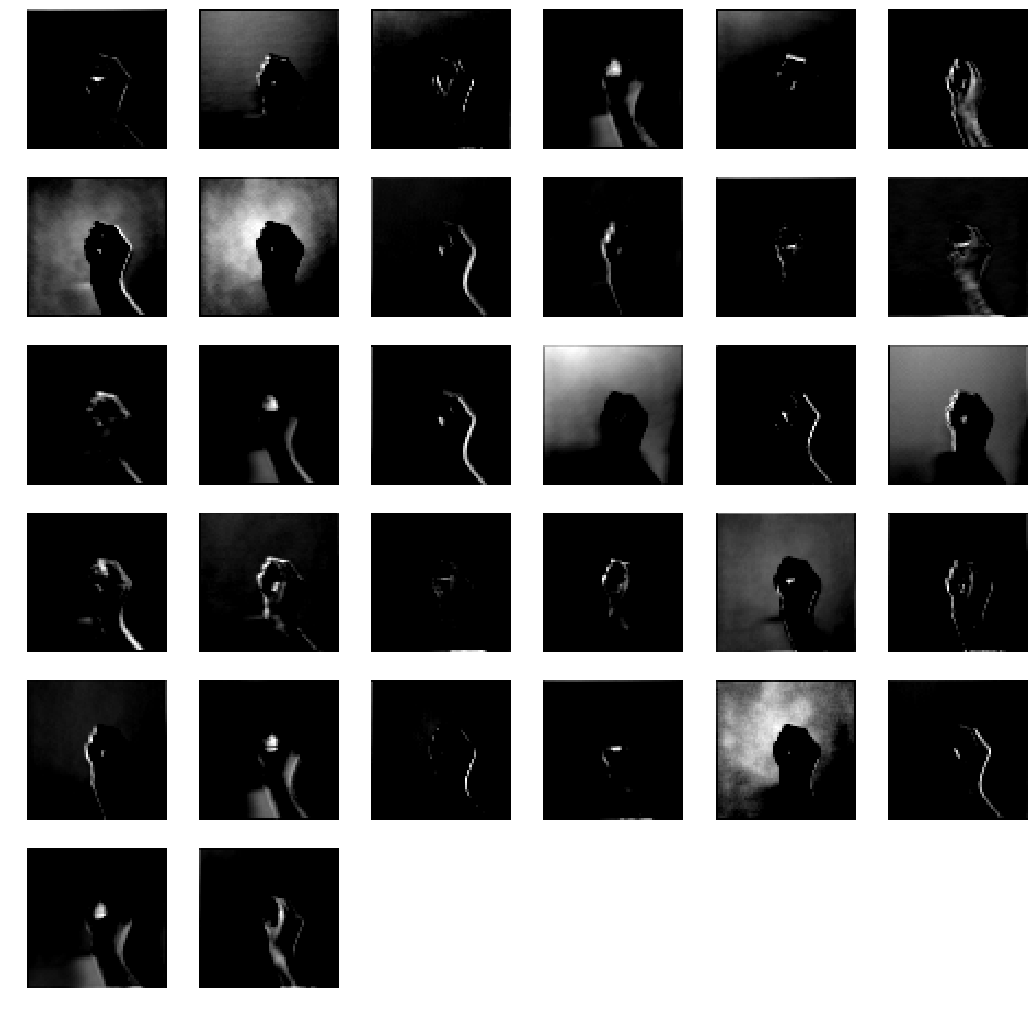

conv2d_2 16
(22, 22, 16)


<Figure size 432x288 with 0 Axes>

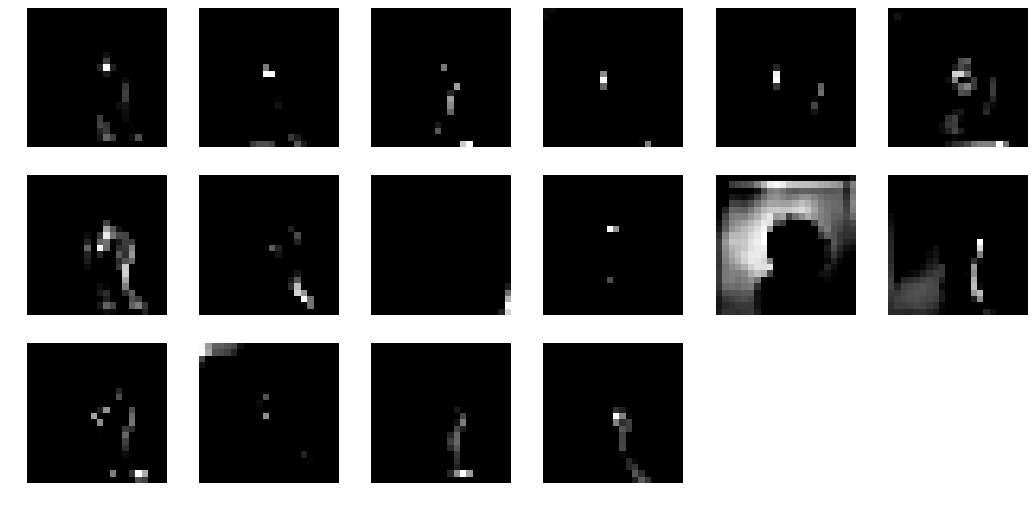

conv2d_3 32
(3, 3, 32)


<Figure size 432x288 with 0 Axes>

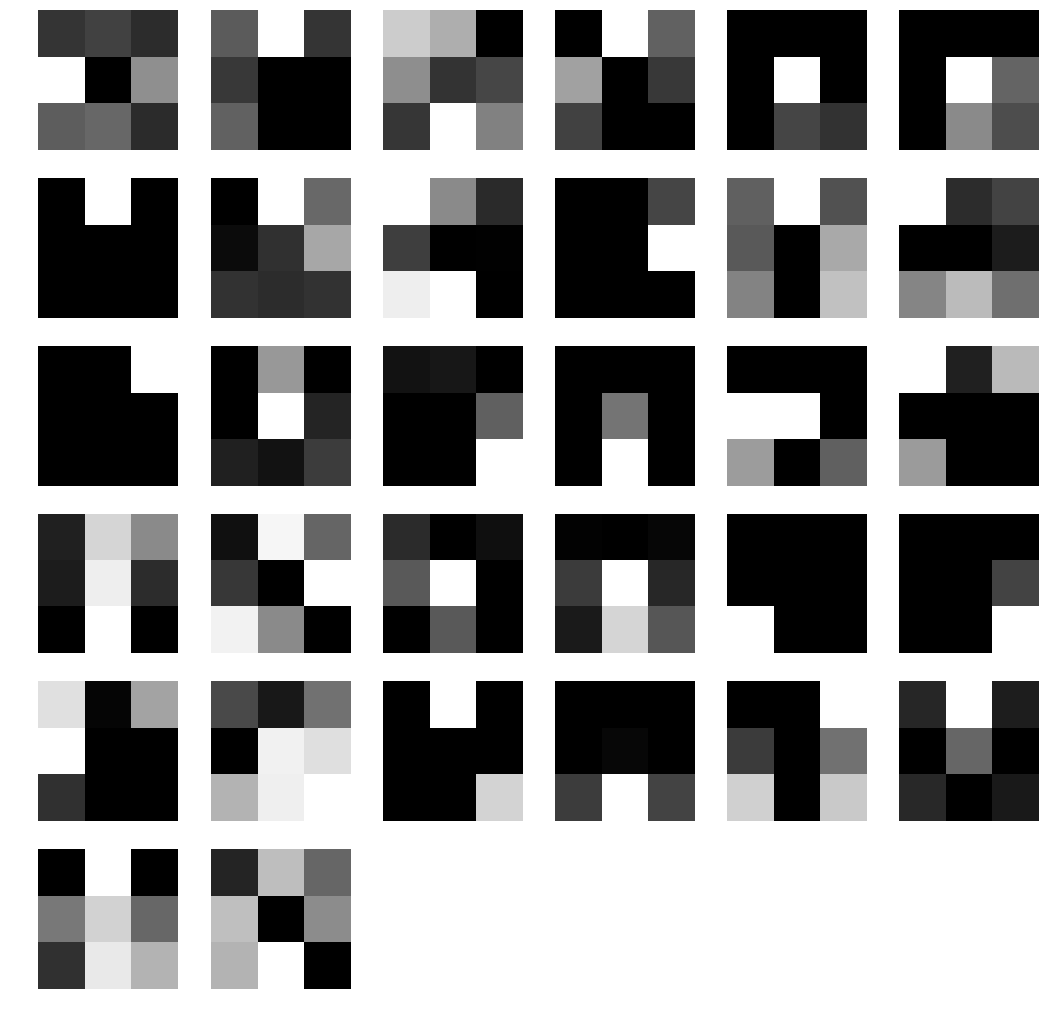

<Figure size 432x288 with 0 Axes>

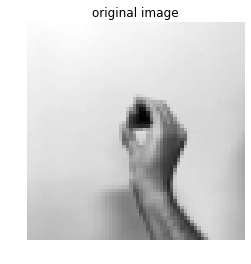

Predicted:  0  True value:  0
conv2d_1 32
(64, 64, 32)


<Figure size 432x288 with 0 Axes>

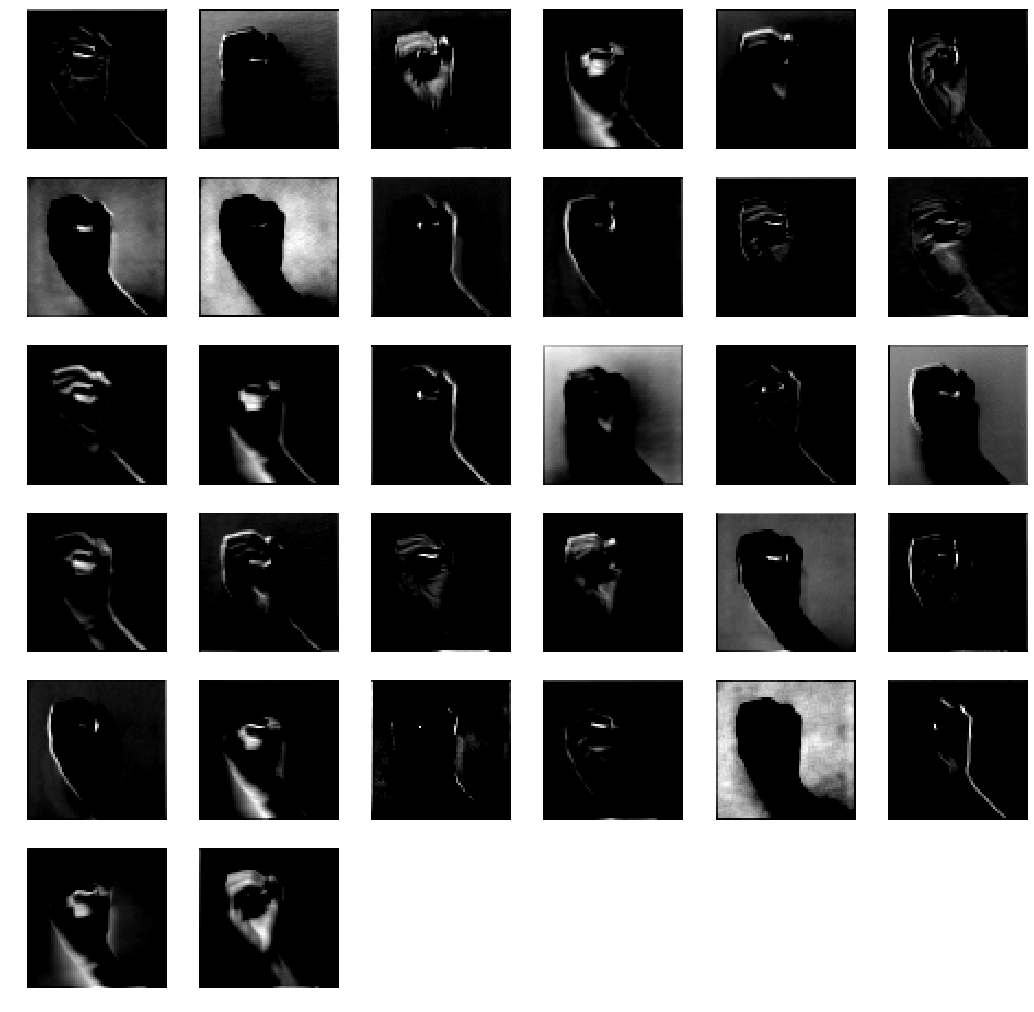

conv2d_2 16
(22, 22, 16)


<Figure size 432x288 with 0 Axes>

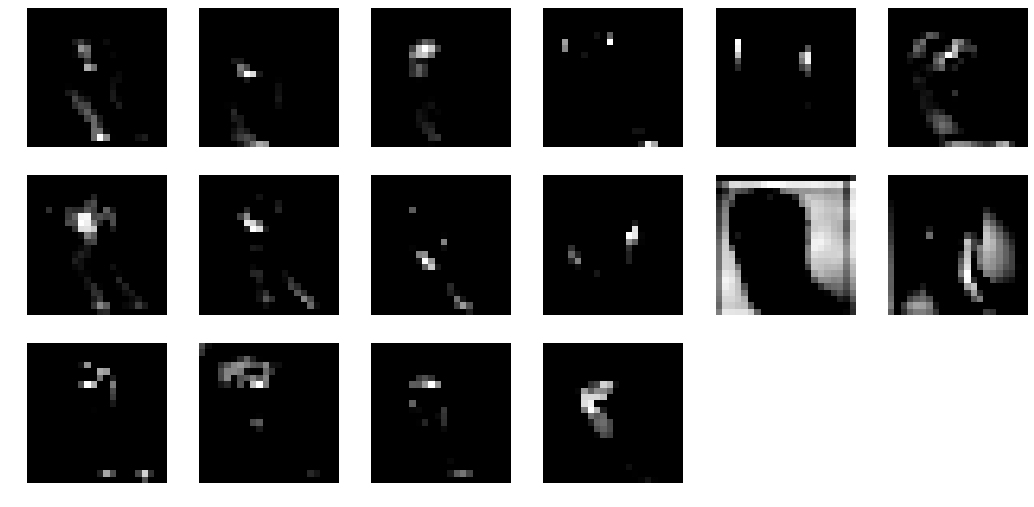

conv2d_3 32
(3, 3, 32)


<Figure size 432x288 with 0 Axes>

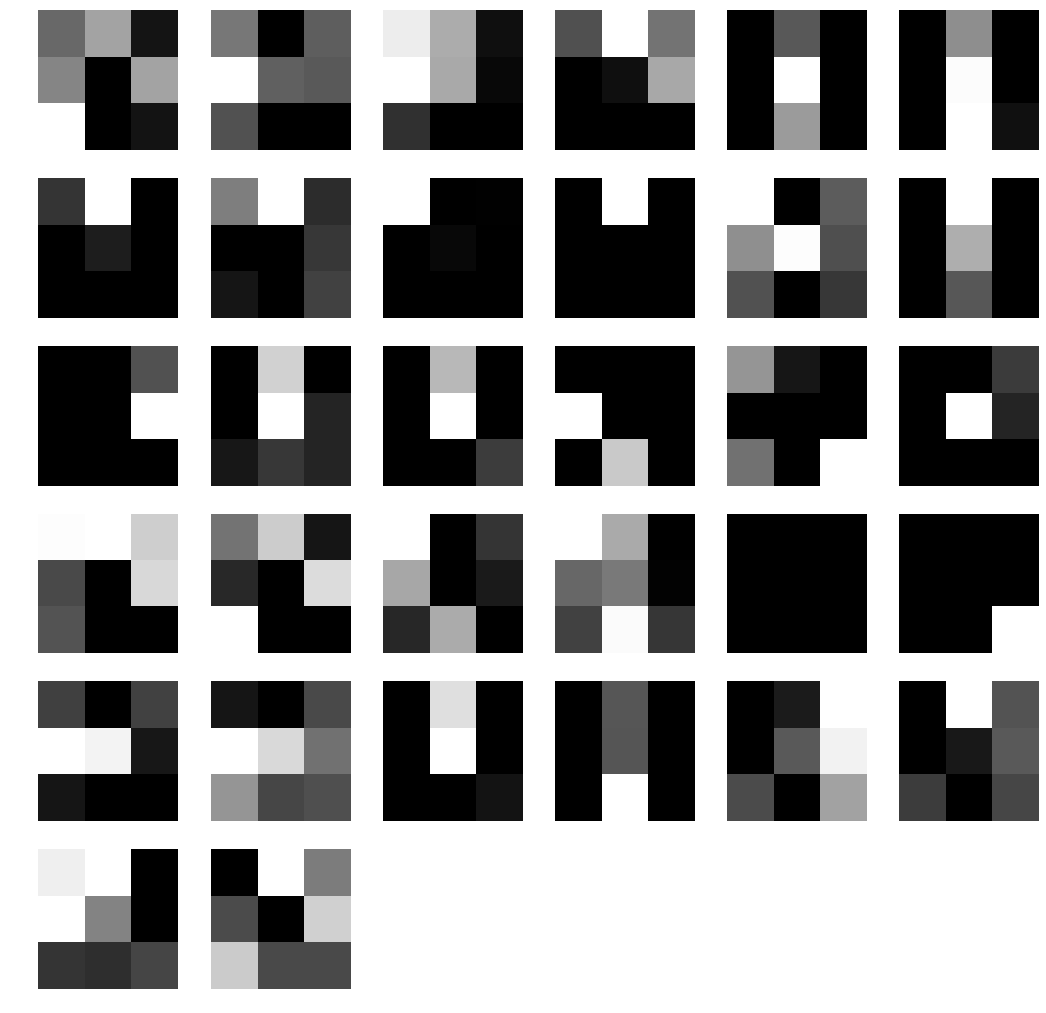

<Figure size 432x288 with 0 Axes>

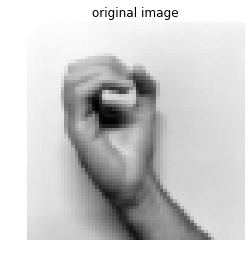

Predicted:  5  True value:  5
conv2d_1 32
(64, 64, 32)


<Figure size 432x288 with 0 Axes>

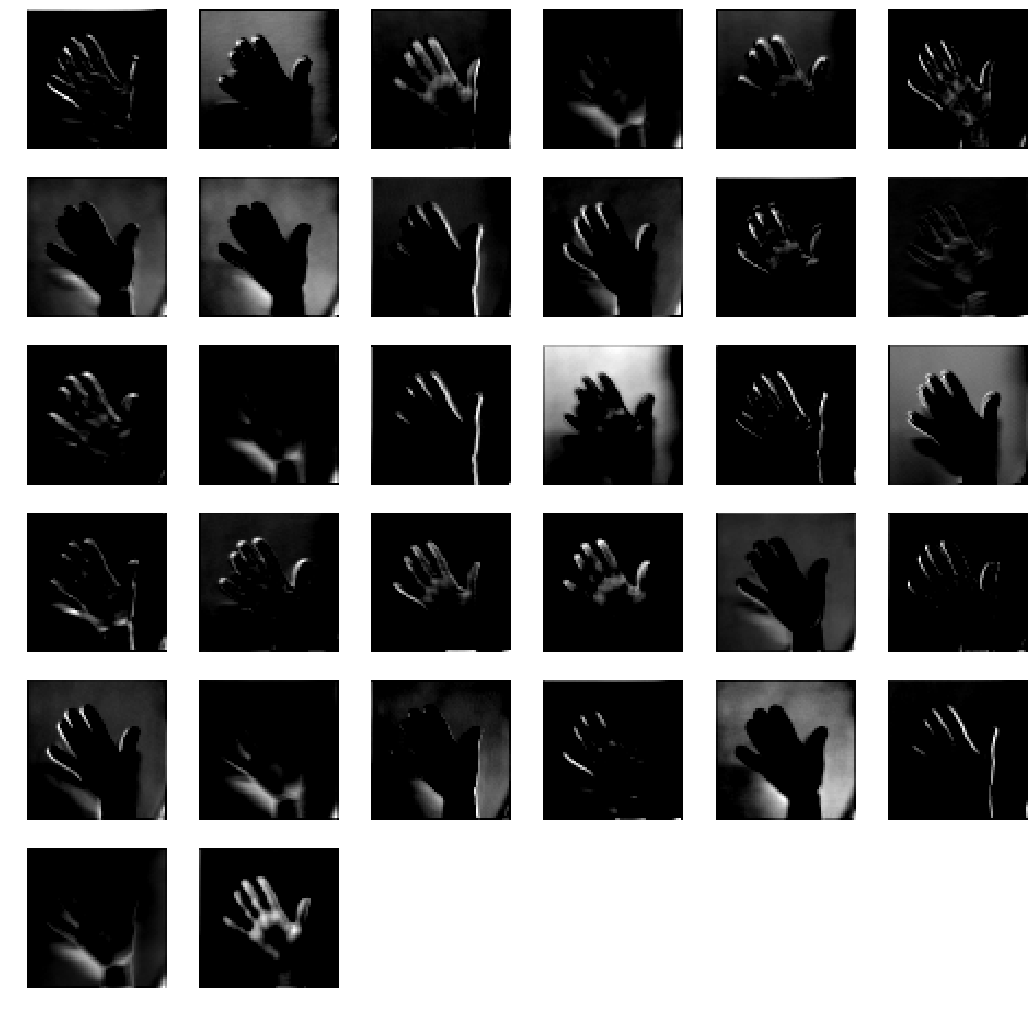

conv2d_2 16
(22, 22, 16)


<Figure size 432x288 with 0 Axes>

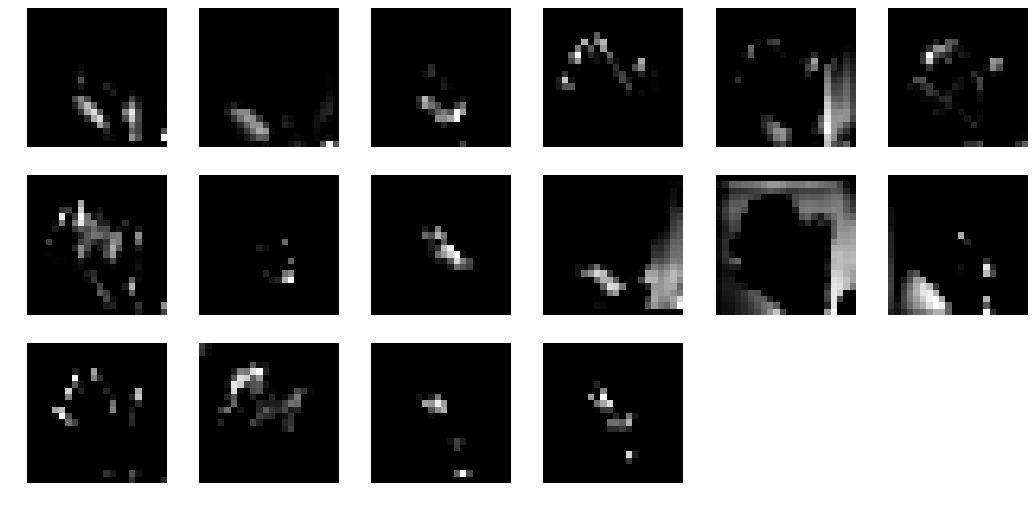

conv2d_3 32
(3, 3, 32)


<Figure size 432x288 with 0 Axes>

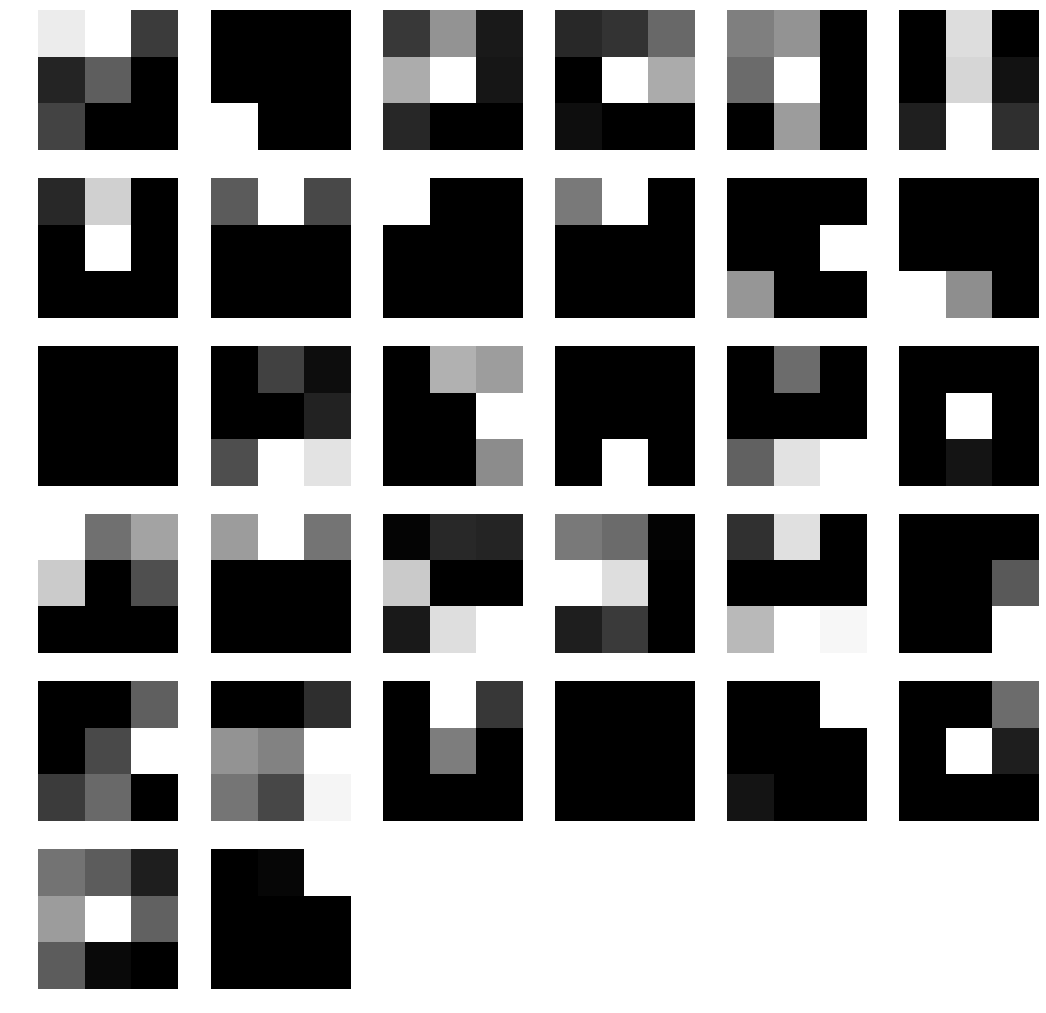

<Figure size 432x288 with 0 Axes>

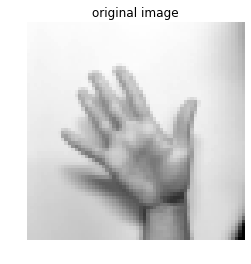

Predicted:  1  True value:  1
conv2d_1 32
(64, 64, 32)


<Figure size 432x288 with 0 Axes>

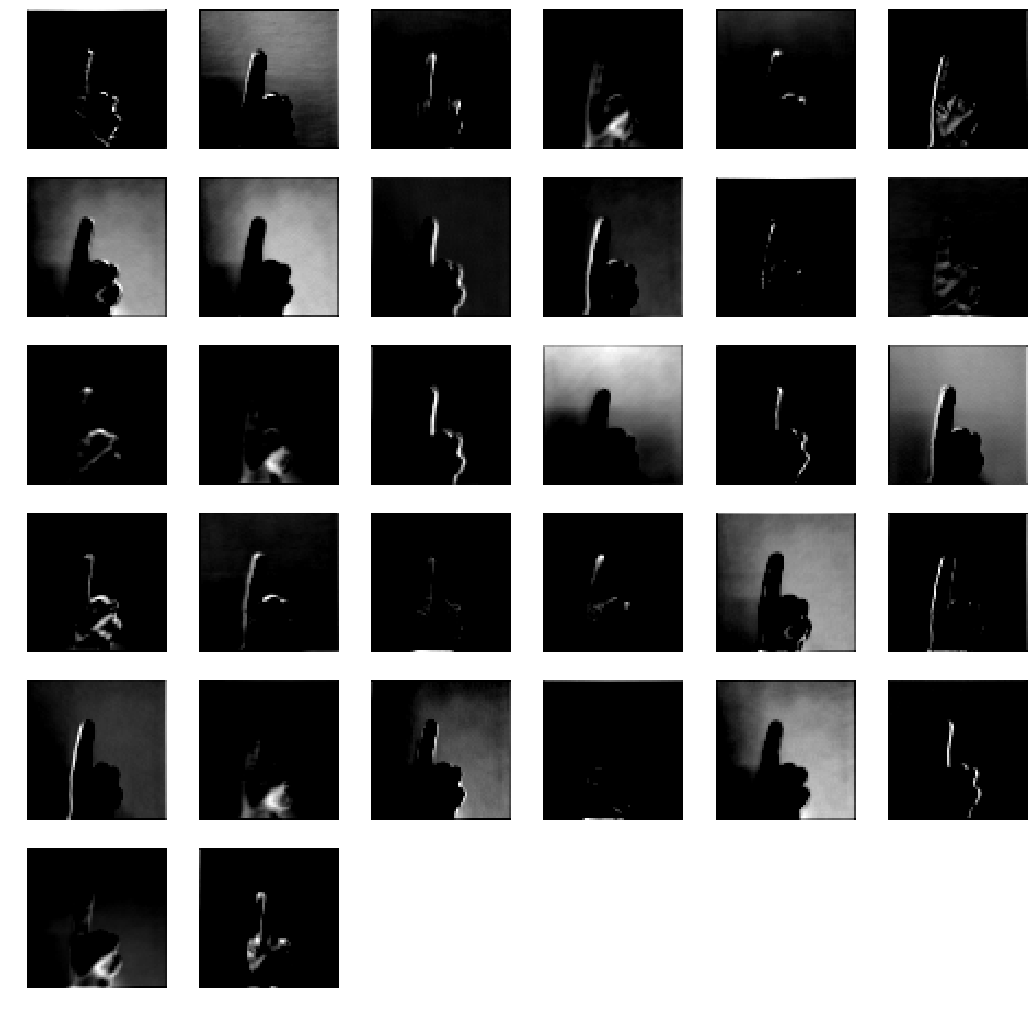

conv2d_2 16
(22, 22, 16)


<Figure size 432x288 with 0 Axes>

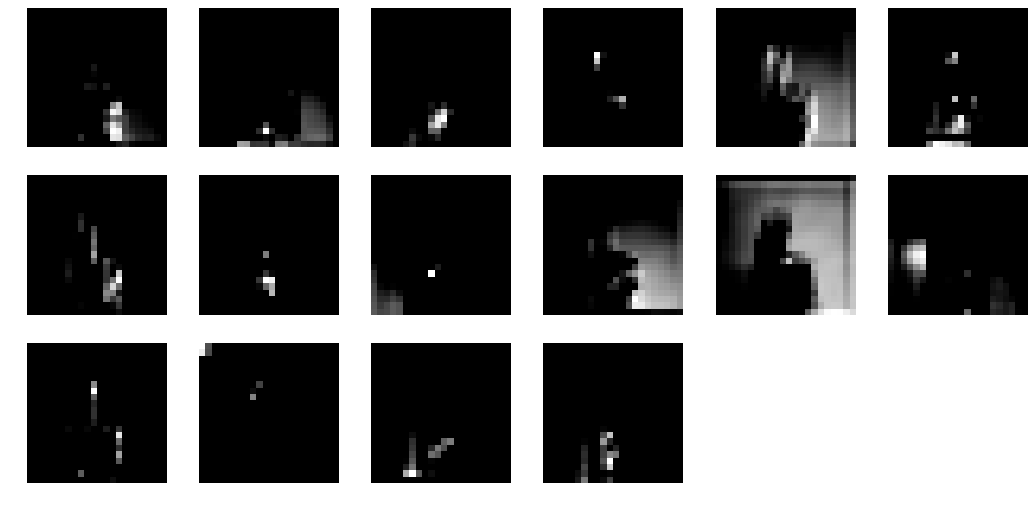

conv2d_3 32
(3, 3, 32)


<Figure size 432x288 with 0 Axes>

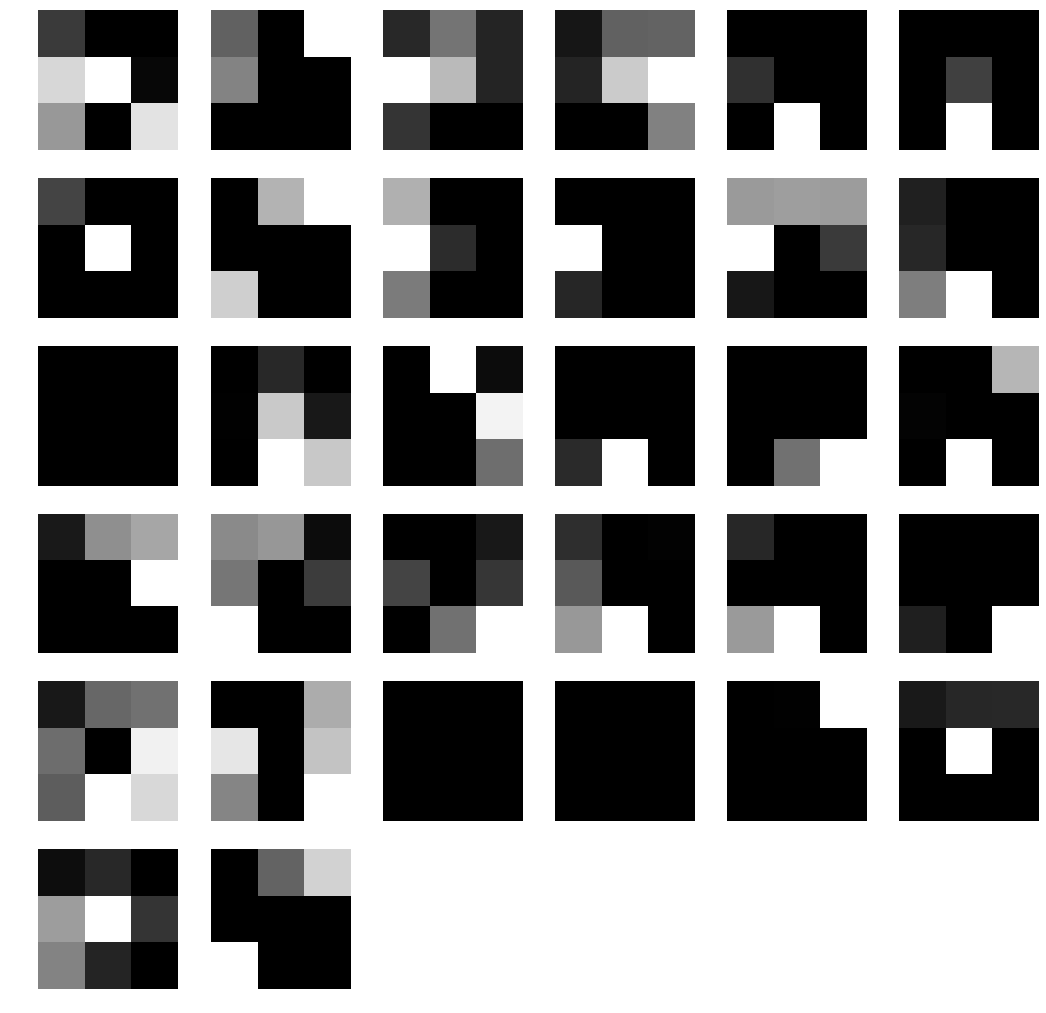

<Figure size 432x288 with 0 Axes>

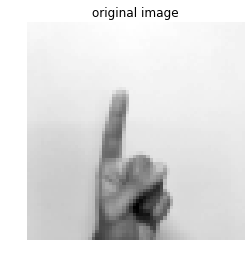

<Figure size 432x288 with 0 Axes>

In [7]:

for x_test,label in zip(X_test[:5],Y_test[:5]):
    x_test= x_test.reshape(1,64,64,-1)
    print('Predicted: ',np.argmax(model.predict(x_test)),' True value: ',np.argmax(label))
    index=0
    for layer in model.layers:
        try:
            n_filters = layer.get_config()['filters']
        except:
            continue
        model_new = Model(inputs=model.input, outputs=layer.output)
        pred = model_new.predict(x_test)

        #For all the filters, plot the output of the input
        filts = pred[0]

        print(layer.get_config()['name'],n_filters)
        plt.figure(figsize=(18,18))
        print(filts.shape)
        for i in range(n_filters):
            filter_digit = filts[:,:,i]
            plt.subplot(6,6,i+1)
            plt.imshow(filter_digit,cmap='gray'); plt.axis('off');
        plt.show()
        plt.clf()
    plt.figure(figsize=(9,4))
    plt.imshow(x_test[0,:,:,0],cmap='gray'); plt.axis('off');
    plt.title('original image');
    plt.show()
    plt.clf()